In [2]:
from utils import setup_env_path

setup_env_path()

%load_ext autoreload
%autoreload 2

Former working directory:  /Users/ambroisebertin/Desktop/prog/prog_abeilles/fil-rouge-pollinisateurs/notebooks
Current working directory:  /Users/ambroisebertin/Desktop/prog/prog_abeilles/fil-rouge-pollinisateurs


In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import missingno as msno

## Import des datasets complets plantes et insectes

In [23]:
# importe les datasets spipoll, plantes et insectes depuis les fichiers csv
spipoll = pd.read_csv('data/spipoll.csv')
plantes = pd.read_csv('data/plantes/plantes.csv')
insectes = pd.read_csv('data/insectes/insect_classif.csv')

/var/folders/cj/gd9mq5b53w51g6wvzmjj8ymr0000gn/T/ipykernel_74304/2189083807.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  spipoll = pd.read_csv('data/spipoll.csv')


In [24]:
spipoll.shape, plantes.shape, insectes.shape

((670744, 34), (670744, 12), (670744, 9))

In [25]:
spipoll.head(3)

,collection_id,collection_nom,protocole_long,user_id,plante_famille,plante_genre,plante_espece,plante_sc,plante_fr,plante_precision,...,fleur_ombre,insecte_sc,insecte_fr,insecte_denominationPlusPrecise,insecte_CdNomtaxref,insecte_abondance,insecte_commentaire,insecte_vu_sur_fleur,nb_validation,nb_suggestion
0,1,sentier ZH,NaN,12 657,Fabaceae,Trifolium,Trifolium pratense,Les Trèfles à fleurs blanches ou roses en boul...,NaN,NaN,...,0,Apis mellifera,L'Abeille mellifère,NaN,NaN,plus de 5,NaN,0.0,3.0,NaN
1,1,sentier ZH,NaN,12 657,Fabaceae,Trifolium,Trifolium pratense,Les Trèfles à fleurs blanches ou roses en boul...,NaN,NaN,...,0,Bombus,Les Bourdons noirs à bande(s) jaune(s) et cul ...,NaN,NaN,1,NaN,0.0,3.0,NaN
2,2,Ma belle collection au jardin des plantes !,NaN,10 918,Acanthaceae,Acanthus,Acanthus spinosus,Acanthus mollis,Acanthe molle,NaN,...,1,Bombus,Les Bourdons noirs à bande(s) jaune(s) et cul ...,NaN,NaN,je n'ai pas l'information,NaN,0.0,3.0,NaN


## Intégration des données de plantes.csv à spipoll.csv

In [16]:
# Verifier que les deux dataframes ont le même index avant la fusion
spipoll = spipoll.reset_index(drop=True)
plantes = plantes.reset_index(drop=True)

# Renommer les colonnes du dataframe plantes
plantes = plantes.rename(columns={"Famille": "plante_famille", "Genre": "plante_genre", "Espece": "plante_espece"})

# Sélectionner les colonnes à ajouter
plantes_to_add = plantes[["plante_famille", "plante_genre", "plante_espece"]]

# Trouver l'index de la colonne 'user_id' dans le dataframe spipoll, après laquelle on va insérer les colonnes de plantes
idx = spipoll.columns.get_loc('user_id')

# Diviser le dataframe spipoll en deux parties
spipoll_1 = spipoll.iloc[:, :idx+1]
spipoll_2 = spipoll.iloc[:, idx+1:]

# Concaténer les trois parties
spipoll = pd.concat([spipoll_1, plantes_to_add, spipoll_2], axis=1)

## Intégration des données de insect_taxonomy.csv à spipoll.csv

In [34]:
# Verifier que les deux dataframes ont le même index avant la fusion
spipoll = spipoll.reset_index(drop=True)
insectes = insectes.reset_index(drop=True)

# Renommer les colonnes du dataframe insectes
insectes = insectes.rename(columns={
    "Ordre": "insecte_ordre", 
    "Super famille": "insecte_super_famille", 
    "Famille": "insecte_famille", 
    "Sous famille": "insecte_sous_famille", 
    "Genre": "insecte_genre", 
    "Espèce": "insecte_espece"
})

# Sélectionner les colonnes à ajouter
insectes_to_add = insectes[["insecte_ordre", "insecte_super_famille", "insecte_famille", "insecte_sous_famille", "insecte_genre", "insecte_espece"]]

# Trouver l'index de la colonne 'user_id' dans le dataframe spipoll, après laquelle on va insérer les colonnes de insectes
idx = spipoll.columns.get_loc('fleur_ombre')

# Diviser le dataframe spipoll en deux parties
spipoll_1 = spipoll.iloc[:, :idx+1]
spipoll_2 = spipoll.iloc[:, idx+1:]

# Concaténer les trois parties
spipoll = pd.concat([spipoll_1, insectes_to_add, spipoll_2], axis=1)

<Axes: >

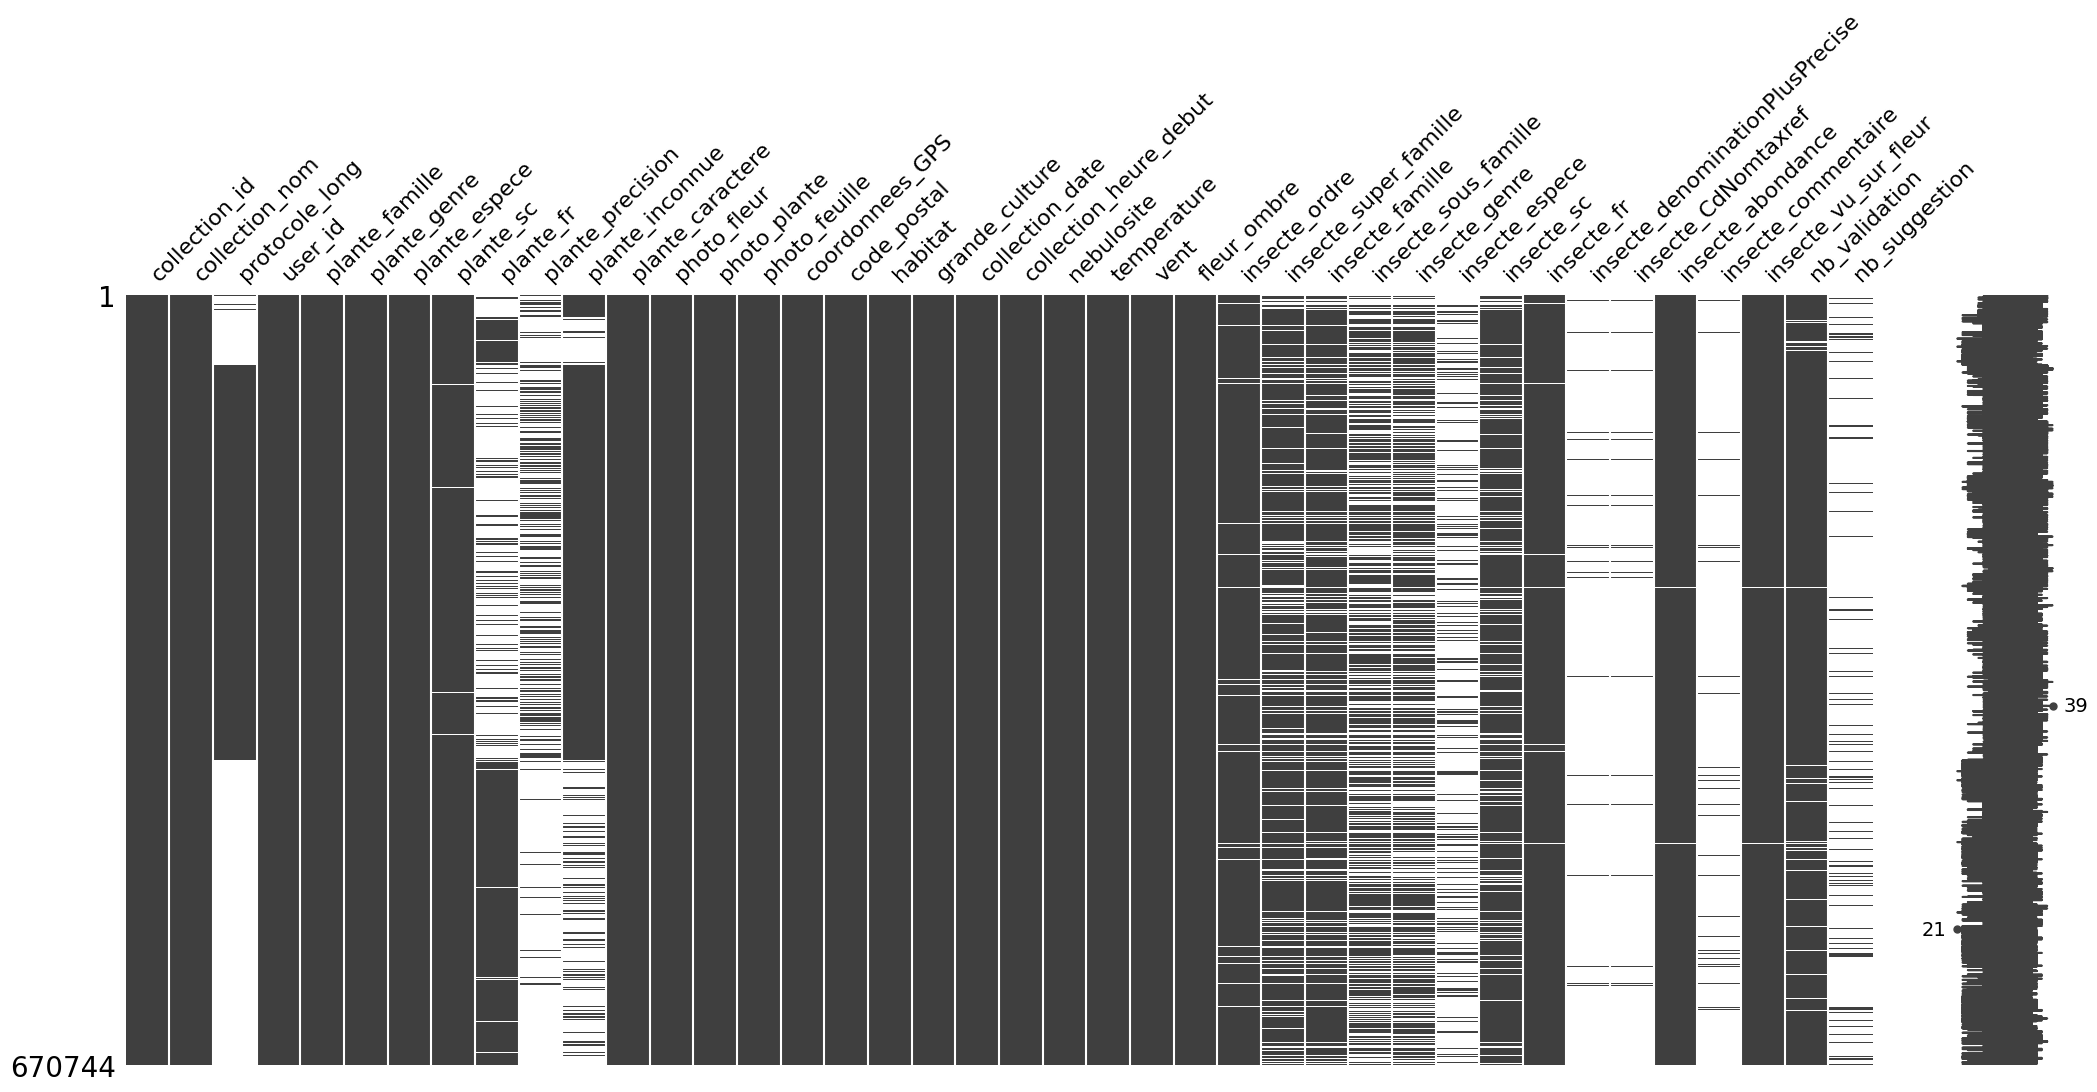

In [36]:
msno.matrix(spipoll)

In [37]:
# sauvegardez le dataframe spipoll dans un fichier csv
spipoll.to_csv('data/spipoll.csv', index=False)